In [1]:
"""
## Task: For this homework you will need to choose one of recent scRNA-seq datasets and perform basic analysis:

1)Preprocessing: filtering out bad cells and normalization
2)UMAP + clustering
3)Marker selection for clusters

I recommend using code snippets from the lecture or usual Scanpy tutorial at https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html 

## Datasets:

1) Transcriptome Analysis Reveals Non-Foamy Rather Than Foamy Plaque Macrophages Are Proinflammatory in Atherosclerotic Murine Models, https://www.ahajournals.org/doi/pdf/10.1161/CIRCRESAHA.118.312804. Link to the dataset: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM3215435
2) Suppressing miR-21 activity in tumor-associated macrophages promotes an antitumor immune response, https://www.jci.org/articles/view/127125. Link to the dataset: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE118931
3) Coopted temporal patterning governs cellular hierarchy, heterogeneity and metabolism in Drosophila neuroblast tumors, https://elifesciences.org/articles/50375. Link to the dataset: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM3161971
4) Single-Cell RNA-Sequencing From Mouse Incisor Reveals Dental Epithelial Cell-Type Specific Genes https://www.frontiersin.org/articles/10.3389/fcell.2020.00841/full . Link to the dataset is https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM4407907
5) Cellular and molecular properties of neural progenitors in the developing mammalian hypothalamus, https://www.nature.com/articles/s41467-020-17890-2. Link to the dataset is https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM3330882

## Requirements: 
1) You will pass this homework by writing a report (Using notebook code + notebook markdown comments) 
which compares your result with the publication. As much detailed as possible.
2) Your report must be understandable. (Something similar to lecture notebook, where you have 
text description + screenshot from publication + your results and most important analysis and conclusion)
You can also compare with your R results and try analyze which paremeters of python package lead to changes 
(for extra sharable across HWs points).
3) You should use at least 2 plots from the link below: 
https://scanpy-tutorials.readthedocs.io/en/latest/plotting/core.html


Extra task (Extra points) : 
Run trajectory inference for your task(Just another way to represent clusters and relations between clusters)  
(https://scanpy-tutorials.readthedocs.io/en/latest/paga-paul15.html)
Try to analyze and make some conclusions about results. (You will need to install python fa2 module, which requires python 3.8 version) 


IMPORTANT:
You can join in pairs. Clever guys please do not refuse the invitation from not clever guys!
Track your activity using Git! If you work in pairs you should have separate repositories with code 
and readable commit history. So you work together, but write code separately!
Upload your results to GitHub and send me the link in a google form
"""

'\n## Task: For this homework you will need to choose one of recent scRNA-seq datasets and perform basic analysis:\n\n1)Preprocessing: filtering out bad cells and normalization\n2)UMAP + clustering\n3)Marker selection for clusters\n\nI recommend using code snippets from the lecture or usual Scanpy tutorial at https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html \n\n## Datasets:\n\n1) Transcriptome Analysis Reveals Non-Foamy Rather Than Foamy Plaque Macrophages Are Proinflammatory in Atherosclerotic Murine Models, https://www.ahajournals.org/doi/pdf/10.1161/CIRCRESAHA.118.312804. Link to the dataset: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM3215435\n2) Suppressing miR-21 activity in tumor-associated macrophages promotes an antitumor immune response, https://www.jci.org/articles/view/127125. Link to the dataset: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE118931\n3) Coopted temporal patterning governs cellular hierarchy, heterogeneity and metabolism in Dro

In [2]:
# ## Requirements: 
# 1) You will pass this homework by writing a report (Using notebook code + notebook markdown comments) 
# which compares your result with the publication. As much detailed as possible.
# 2) Your report must be understandable. (Something similar to lecture notebook, where you have 
# text description + screenshot from publication + your results and most important analysis and conclusion)
# You can also compare with your R results and try analyze which paremeters of python package lead to changes 
# (for extra sharable across HWs points).
# 3) You should use at least 2 plots from the link below: 
# https://scanpy-tutorials.readthedocs.io/en/latest/plotting/core.html


#just add 1-2 plots(maybe)
#and write down a conclusions(or just cope from Kosta's scrna-seq report)

# 1. Load the data

In [3]:
# import sys
# !{sys.executable} -m pip install scanpy

In [4]:
# import sys
# !{sys.executable} -m pip install numba --upgrade --user         #0.51.2 or ==0.55.1    

In [5]:
# import sys
# !{sys.executable} -m pip install --upgrade scanpy

In [40]:
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib.pyplot import rc_context


### Load 10x data into an AnnData object

In [7]:
adata = sc.read_10x_mtx(
    '/home/roma/ITMO_EDUCATION/second_term/sci_python/HWs/data/scanpy',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

### Filtering

In [8]:
sc.pp.filter_cells(adata, min_genes=10)
sc.pp.filter_genes(adata, min_cells=10)

In [9]:
adata

AnnData object with n_obs × n_vars = 3781 × 13105
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

## Genes

In [10]:
adata.var

,gene_ids,n_cells
Mrpl15,ENSMUSG00000033845,1349
Lypla1,ENSMUSG00000025903,1181
Tcea1,ENSMUSG00000033813,1863
Atp6v1h,ENSMUSG00000033793,1329
Rb1cc1,ENSMUSG00000025907,917
...,...,...
AC168977.2,ENSMUSG00000094915,17
AC168977.1,ENSMUSG00000079808,65
PISD,ENSMUSG00000095041,2263
DHRSX,ENSMUSG00000063897,1017


In [11]:
adata.var_names

Index(['Mrpl15', 'Lypla1', 'Tcea1', 'Atp6v1h', 'Rb1cc1', '4732440D04Rik',
       'St18', 'Pcmtd1', 'Rrs1', 'Mybl1',
       ...
       'Tmlhe', 'AC133103.1', 'Csprs', 'AC125149.3', 'AC125149.2',
       'AC168977.2', 'AC168977.1', 'PISD', 'DHRSX', 'CAAA01147332.1'],
      dtype='object', length=13105)

## Observations

In [12]:
adata.obs.head(10)

,n_genes
AAACCTGAGATGCCTT-1,2218
AAACCTGAGCTAGTGG-1,1209
AAACCTGCAAGCTGTT-1,2084
AAACCTGCACCGAATT-1,1961
AAACCTGCACGCTTTC-1,908
AAACCTGCAGGACCCT-1,2985
AAACCTGGTCACAAGG-1,2028
AAACCTGGTCACCTAA-1,1727
AAACCTGGTCCGTGAC-1,3000
AAACCTGGTCTCACCT-1,1156


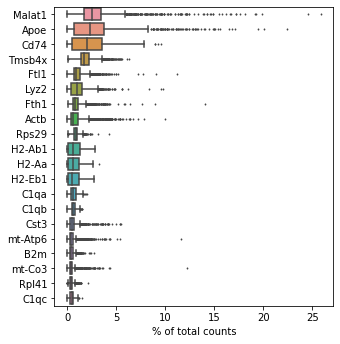

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20, )

# 2. Visualize and filter out poor-quality cells

In [14]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
adata.var

,gene_ids,n_cells,mt
Mrpl15,ENSMUSG00000033845,1349,False
Lypla1,ENSMUSG00000025903,1181,False
Tcea1,ENSMUSG00000033813,1863,False
Atp6v1h,ENSMUSG00000033793,1329,False
Rb1cc1,ENSMUSG00000025907,917,False
...,...,...,...
AC168977.2,ENSMUSG00000094915,17,False
AC168977.1,ENSMUSG00000079808,65,False
PISD,ENSMUSG00000095041,2263,False
DHRSX,ENSMUSG00000063897,1017,False


In [15]:
adata.var['mt'].value_counts()

False    13105
Name: mt, dtype: int64

In [16]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=True, inplace=True)

In [17]:
# “n_genes_by_counts”. The number of genes with at least 1 count in a cell. Calculated for all cells.
# “total_counts”. Total number of counts for a cell.

adata.obs

,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACCTGAGATGCCTT-1,2218,2216,7.703910,8159.0,9.006999,0.0,0.0,0.0
AAACCTGAGCTAGTGG-1,1209,1205,7.095064,3113.0,8.043663,0.0,0.0,0.0
AAACCTGCAAGCTGTT-1,2084,2083,7.642044,8289.0,9.022805,0.0,0.0,0.0
AAACCTGCACCGAATT-1,1961,1960,7.581210,5459.0,8.605204,0.0,0.0,0.0
AAACCTGCACGCTTTC-1,908,907,6.811244,2433.0,7.797291,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
TTTGTCAAGCGGCTTC-1,1667,1667,7.419381,5576.0,8.626407,0.0,0.0,0.0
TTTGTCAAGTCCTCCT-1,2732,2728,7.911691,9265.0,9.134107,0.0,0.0,0.0
TTTGTCACAGGCTCAC-1,2012,2011,7.606885,7086.0,8.866017,0.0,0.0,0.0
TTTGTCACATCACCCT-1,2922,2920,7.979681,11526.0,9.352448,0.0,0.0,0.0


In [18]:
#“pct_dropout_by_counts”. Percentage of cells this feature does not appear in.
#“n_cells_by_counts”. Number of cells this expression is measured in.
# “mean_counts”. Mean expression over all cells.
#  “total_counts”. Sum of counts for a gene.
adata.var

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
Mrpl15,ENSMUSG00000033845,1349,False,1349,0.500661,0.405906,64.321608,1893.0,7.546446
Lypla1,ENSMUSG00000025903,1181,False,1181,0.406771,0.341297,68.764877,1538.0,7.338888
Tcea1,ENSMUSG00000033813,1863,False,1863,0.767786,0.569728,50.727321,2903.0,7.973845
Atp6v1h,ENSMUSG00000033793,1329,False,1329,0.503570,0.407843,64.850569,1904.0,7.552238
Rb1cc1,ENSMUSG00000025907,917,False,917,0.297011,0.260063,75.747157,1123.0,7.024649
...,...,...,...,...,...,...,...,...,...
AC168977.2,ENSMUSG00000094915,17,False,17,0.004496,0.004486,99.550383,17.0,2.890372
AC168977.1,ENSMUSG00000079808,65,False,65,0.018514,0.018344,98.280878,70.0,4.262680
PISD,ENSMUSG00000095041,2263,False,2263,1.182227,0.780346,40.148109,4470.0,8.405367
DHRSX,ENSMUSG00000063897,1017,False,1017,0.345147,0.296503,73.102354,1305.0,7.174724


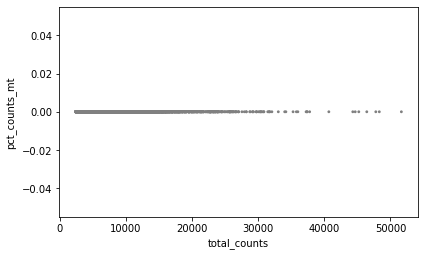

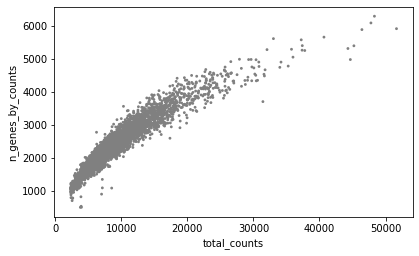

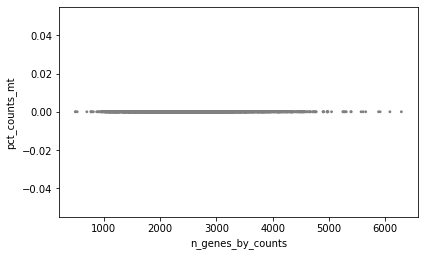

In [19]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
sc.pl.scatter(adata, x='n_genes_by_counts', y='pct_counts_mt')

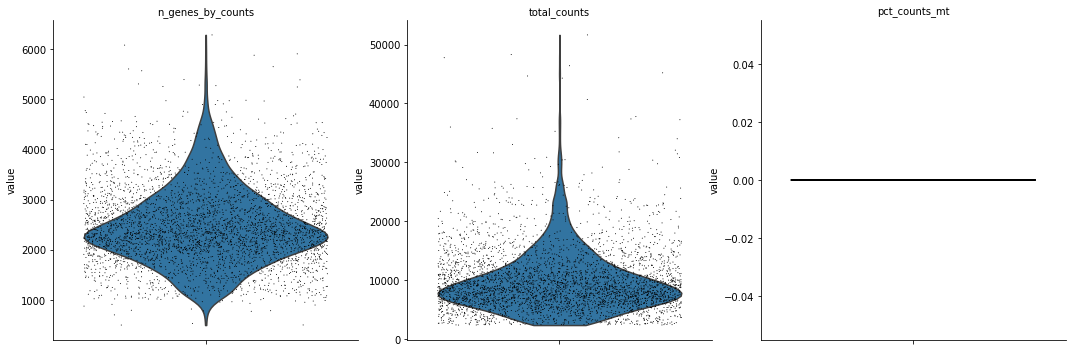

In [20]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

### Filtering based on:
1. number of counts
2. mitochondrial content

In [21]:
adata = adata[adata.obs.n_genes_by_counts > 1000, :].copy()
adata = adata[adata.obs.pct_counts_mt < 5, :].copy()

adata

AnnData object with n_obs × n_vars = 3758 × 13105
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

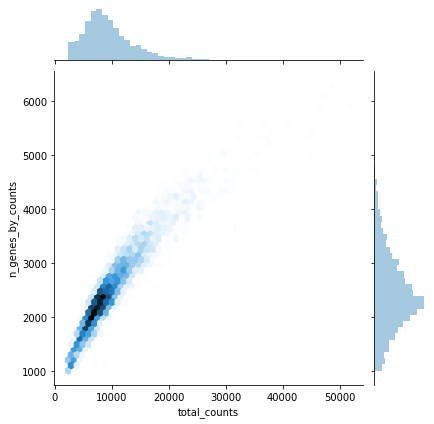

In [22]:
import scanpy as sc
import seaborn as sns

sns.jointplot(
    data=adata.obs,
    x="total_counts",
    y="n_genes_by_counts",
    kind="hex",
)

# 3. Normalize and scale the data

In [23]:
pd.DataFrame.sparse.from_spmatrix(adata.X[:100, :100])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,1.0,2.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
97,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### log-normalization

In [24]:
sc.pp.normalize_total(adata, target_sum=1e4) # Total-count normalize (library-size correct) the data matrix X to 10,000 reads per cell, so that counts become comparable among cells.
sc.pp.log1p(adata) 


In [25]:
pd.DataFrame.sparse.from_spmatrix(adata.X[:100, :100])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.800045,0.000000,0.000000,0.000000,0.000000,0.800045,0.0,0.000000,0.0,0.0,...,0.000000,0.800045,0.800045,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,1.438017,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.791370,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,1.950484,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.000000,0.000000,1.040926,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,1.040926,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.000000,0.000000,0.000000,1.003245,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.622487,1.003245,0.0,0.0,0.622487,0.0,0.0,0.622487,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.000000,0.000000,0.691253,0.000000,0.0,1.096085,0.0,0.0,...,0.000000,0.000000,0.691253,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
96,0.444850,0.751657,1.175889,0.751657,0.000000,0.000000,0.0,0.444850,0.0,0.0,...,0.444850,0.000000,0.986103,0.0,0.0,0.986103,0.0,0.0,0.000000,0.0
97,0.000000,0.458928,0.772307,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.772307,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
98,0.899712,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.547802,0.000000,0.547802,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


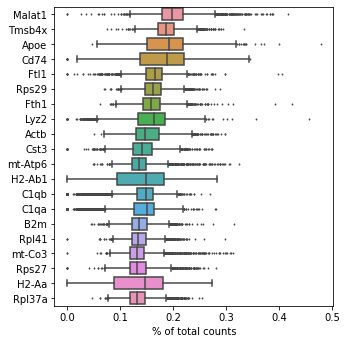

In [26]:
sc.pl.highest_expr_genes(adata, n_top=20, )

# 4. Identification of highly variable features

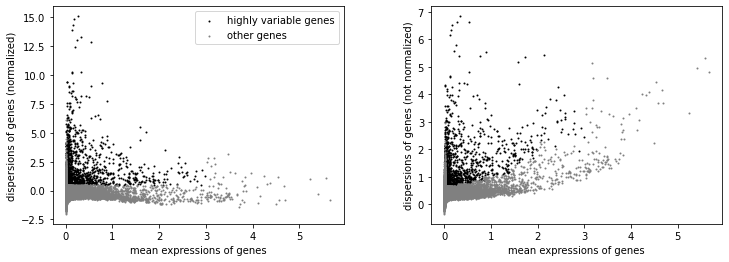

In [27]:
import matplotlib.pyplot as plt
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
gca = sc.pl.highly_variable_genes(adata, show=False, log=False)

In [28]:
adata.var['highly_variable'].value_counts()

False    11795
True      1310
Name: highly_variable, dtype: int64

# 5. PCA dimensionality reduction

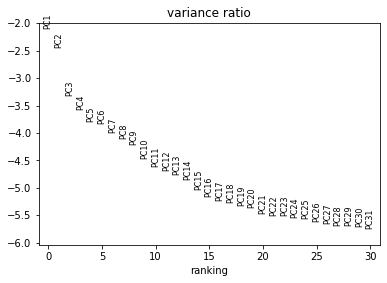

In [29]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

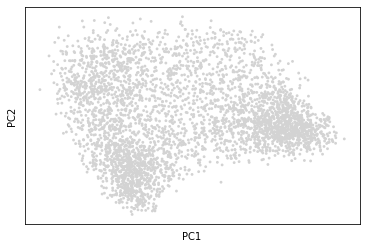

In [30]:
sc.pl.pca(adata)

# 6. Compute neghborhood graph and embedd it using tSNE 

None
None


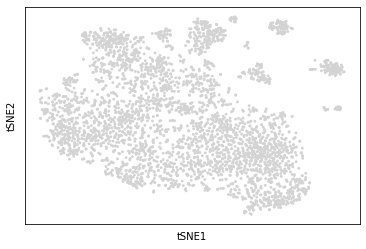

None


In [43]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=30)
sc.tl.tsne(adata)
sc.pl.tsne(adata)

# 7. Clustering

In [44]:
# import sys
# !{sys.executable} -m pip install louvain

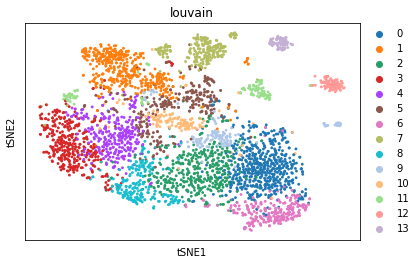

In [45]:
sc.tl.louvain(adata, resolution=1.2)
# sc.pl.umap(adata, color='louvain')
sc.pl.tsne(adata, color='louvain')

## Another formatting with labeling

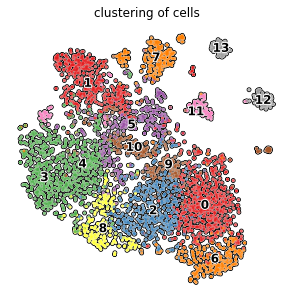

In [49]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.tsne(adata, color='louvain', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette='Set1')

# 8. Running DGE tests to find cluster biomarkers

In [46]:
sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Pf4,Lgals3,Jun,Il1b,Nfkbia,Ccr2,Ccl6,Napsa,Ier3,Cd81,Irf7,Stmn1,Cd3g,Naaa


# 9. Heatmaps of well-known immune cell markers

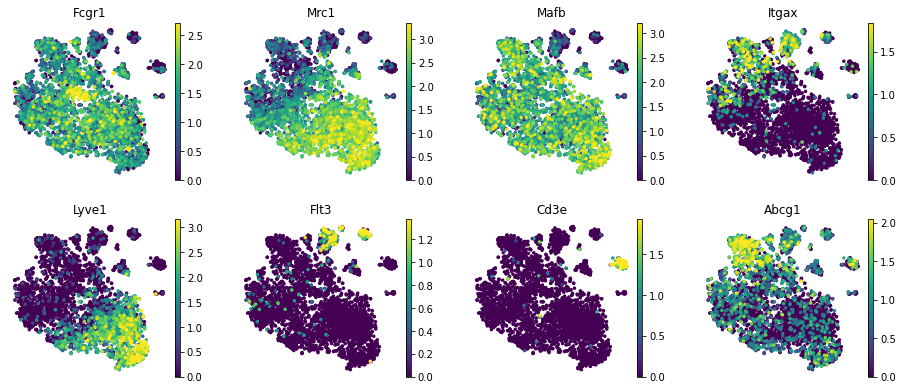

In [47]:
with rc_context({'figure.figsize': (3, 3)}):
    sc.pl.tsne(adata, color=["Fcgr1", "Mrc1", "Mafb","Itgax", "Lyve1", "Flt3", "Cd3e", "Abcg1"], 
               s=50, frameon=False, ncols=4, vmax='p99')

# 10. Conclusion

I tried to reproduce the main plots from this article including **tSNE and highly variable features**. Therefore, I read the supplementary materials (different steps of scRNA-seq workflow) and used as many specified parameters as possible

At the end I got a similar **tSNE plot** with the same number of identified clusters (14). The shape of the tSNE is differ mostly because this method includes randomization. *Heatmaps of markers seems to be very close to the publication's figure*